In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
lm = LinearRegression()

In [134]:
halteBus = pd.read_csv('DAFTAR-HALTE-BUS-SEKOLAH-edited.csv')
dataBusSekolah = pd.read_csv('Data-Bus-Sekolah-DKI-Jakarta-Tahun-2015.csv')
penumpangBus = pd.read_csv('data-jumlah-penumpang-angkutan-bus-sekolah-tahun-2014.csv')
ruteBus = pd.read_csv('Rute-Angkutan-Bus-Sekolah-Tahun-2015.csv')

In [135]:
halteBusFix = halteBus.loc[:,'lokasi_halte':'tahun_pembuatan']
halteBusFix

,lokasi_halte,tahun_pembuatan
0,Jl. Otista Raya depan GOR,2005
1,Jl. Otista Raya depan Sekolahan / BRI,2005
2,Jl. Otista Raya dekat Mess UI,2005
3,Jl. Raya Bogor dekat kampus 10 November,2005
4,Jl. Sutoyo seberang BKN,2005
5,Jl. Sutoyo depan Perumnas / Bank Mandiri,2005
6,Jl. Sutoyo simpang Trikora Kalimalang,2005
7,Jl. Raya Taman Mini dekat jalan Tol,2005
8,Jl. Raya Taman Mini dekat Pintu 1,2005
9,Jl. Pondok Gede dekat sekolahan SDN 06 Pg Kamp...,2005


In [136]:
dataBusSekolah

,no_body,no_regristasi,nama_pemilik,alamat,wilayah,jenis_kendaraan,merk_type,jenis_model,tahun,isi_silinder,no_rangka,no_mesin,keterangan
0,BS 01,B 7070.QK,DISHUB PROVINSI DKI JAKARTA,"Jl. Taman Jatibaru No.1, Jakarta Pusat",Jakarta Pusat,SEDANG,Mitsubishi,Micro/Minibus,2006,4214,MHMFE447F6T002083,4D33BX2335,PROSES PENGHAPUSAN
1,BS 02,B 7071.QK,DISHUB PROVINSI DKI JAKARTA,"Jl. Taman Jatibaru No.1, Jakarta Pusat",Jakarta Pusat,SEDANG,Mitsubishi,Micro/Minibus,2006,4214,MHMFE447F6T002076,4D33BX2328,PROSES PENGHAPUSAN
2,BS 03,B 7072.QK,DISHUB PROVINSI DKI JAKARTA,"Jl. Taman Jatibaru No.1, Jakarta Pusat",Jakarta Pusat,SEDANG,Mitsubishi,Micro/Minibus,2006,4214,MHMFE447F6T002049,4D33B02181,PROSES PENGHAPUSAN
3,BS 04,B 7073.QK,DISHUB PROVINSI DKI JAKARTA,"Jl. Taman Jatibaru No.1, Jakarta Pusat",Jakarta Pusat,SEDANG,Mitsubishi,Micro/Minibus,2006,4214,MHMFE447F6T002038,4D33B92170,PROSES PENGHAPUSAN
4,BS 05,B 7074.QK,DISHUB PROVINSI DKI JAKARTA,"Jl. Taman Jatibaru No.1, Jakarta Pusat",Jakarta Pusat,SEDANG,Mitsubishi,Micro/Minibus,2006,4214,MHMFE447F6T002037,4D33B92169,PROSES PENGHAPUSAN
5,BS 06,B 7075.QK,DISHUB PROVINSI DKI JAKARTA,"Jl. Taman Jatibaru No.1, Jakarta Pusat",Jakarta Pusat,SEDANG,Mitsubishi,Micro/Minibus,2006,4214,MHMFE447F6T002081,4D33BX2333,PROSES PENGHAPUSAN
6,BS 07,B 7076.QK,DISHUB PROVINSI DKI JAKARTA,"Jl. Taman Jatibaru No.1, Jakarta Pusat",Jakarta Pusat,SEDANG,Mitsubishi,Micro/Minibus,2006,4214,MHMFE447F6T002080,4D33BX2332,PROSES PENGHAPUSAN
7,BS 08,B 7077.QK,DISHUB PROVINSI DKI JAKARTA,"Jl. Taman Jatibaru No.1, Jakarta Pusat",Jakarta Pusat,SEDANG,Mitsubishi,Micro/Minibus,2006,4214,MHMFE447F6T002059,4D33B02191,PROSES PENGHAPUSAN
8,BS 10,B 7079.QK,DISHUB PROVINSI DKI JAKARTA,"Jl. Taman Jatibaru No.1, Jakarta Pusat",Jakarta Pusat,SEDANG,Mitsubishi,Micro/Minibus,2006,4214,MHMFE447F6T002072,4D33BX2324,PROSES PENGHAPUSAN
9,BS 11,B 7080.QK,DISHUB PROVINSI DKI JAKARTA,"Jl. Taman Jatibaru No.1, Jakarta Pusat",Jakarta Pusat,SEDANG,Mitsubishi,Micro/Minibus,2006,4214,MHMFE447F6T002064,4D33BO2196,PROSES PENGHAPUSAN


In [137]:
dataBusSekolah['keterangan'].nunique()

1

In [138]:
penumpangBus

,rute,nama_rute,bulan,jumlah
0,Rute 1,Lapangan Banteng - Perintis,2014-01,14600
1,Rute 2,Pelumpang - Sunter - Kemayoran,2014-01,11378
2,Rute 3,TMII - Gandaria,2014-01,18132
3,Rute 4,Pondok Kopi - Perintis Kemerdekaan,2014-01,16188
4,Rute 5,TMII - Terminal Kampung Melayu,2014-01,12174
5,Rute 6,Terminal Pasar Minggu - Kebayoran,2014-01,10634
6,Rute 7,Terminal Pasar Minggu - Universitas Indonesia,2014-01,16922
7,Rute 8,Terminal Pasar Minggu - Manggarai,2014-01,10620
8,Rute 9,Cawang - PGC - Plumpang,2014-01,7081
9,Rute 10,Cilincing - Perintis,2014-01,3219


In [139]:
penumpangBus['rute'].nunique()

20

In [140]:
ruteBus

,jenis_rute,nama_rute,rute,jumlah_armada
0,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8
1,Rute Reguler,Rute 2,PLUMPANG - SUNTER - KEMAYORAN,8
2,Rute Reguler,Rute 3,TMII - GANDARIA,8
3,Rute Reguler,Rute 4,PRINTIS KEMERDEKAAN - PONDOK KOPI,8
4,Rute Reguler,Rute 5,TMII - TB.KAMPUNG MELAYU,8
5,Rute Reguler,Rute 6,KEBAYORAN - TB.PASAR MINGGU,8
6,Rute Reguler,Rute 7,TB.PASAR MINGGU - RANCO - LT.AGUNG - UI,6
7,Rute Reguler,Rute 8,TB.PASAR MINGGU - TB.MANGGARAI,4
8,Rute Reguler,Rute 9,CAWANG - PLUMPANG,4
9,Rute Reguler,Rute 10,CILINCING - PRINTIS KEMERDEKAAN,4


In [141]:
ruteBus.rename(columns={'nama_rute':'ruteCode'},inplace=True)
penumpangBus.rename(columns={'rute':'ruteCode'},inplace=True)

In [142]:
ruteBusFix = ruteBus.loc[:14]

In [143]:
ruteBusFix

,jenis_rute,ruteCode,rute,jumlah_armada
0,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8
1,Rute Reguler,Rute 2,PLUMPANG - SUNTER - KEMAYORAN,8
2,Rute Reguler,Rute 3,TMII - GANDARIA,8
3,Rute Reguler,Rute 4,PRINTIS KEMERDEKAAN - PONDOK KOPI,8
4,Rute Reguler,Rute 5,TMII - TB.KAMPUNG MELAYU,8
5,Rute Reguler,Rute 6,KEBAYORAN - TB.PASAR MINGGU,8
6,Rute Reguler,Rute 7,TB.PASAR MINGGU - RANCO - LT.AGUNG - UI,6
7,Rute Reguler,Rute 8,TB.PASAR MINGGU - TB.MANGGARAI,4
8,Rute Reguler,Rute 9,CAWANG - PLUMPANG,4
9,Rute Reguler,Rute 10,CILINCING - PRINTIS KEMERDEKAAN,4


In [144]:
merge1 = pd.merge(ruteBusFix,penumpangBus,how='inner',on='ruteCode')
merge1

,jenis_rute,ruteCode,rute,jumlah_armada,nama_rute,bulan,jumlah
0,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8,Lapangan Banteng - Perintis,2014-01,14600
1,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8,Lapangan Banteng - Perintis,2014-02,15549
2,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8,Lapangan Banteng - Perintis,2014-03,18289
3,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8,Lapangan Banteng - Perintis,2014-04,15299
4,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8,Lapangan Banteng - Perintis,2014-05,5947
5,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8,Lapangan Banteng - Perintis,2014-06,1931
6,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8,Lapangan Banteng - Perintis,2014-07,0
7,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8,Lapangan Banteng - Perintis,2014-08,484
8,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8,Lapangan Banteng - Perintis,2014-09,12563
9,Rute Reguler,Rute 1,LAPANGAN BANTENG - PRINTIS KEMERDEKAAN,8,Lapangan Banteng - Perintis,2014-10,18675


In [159]:
dumMerge2 = merge1.groupby('bulan').describe()

jumlah                                                        \
         count          mean          std     min       25%      50%   
bulan                                                                  
2014-01   14.0  10359.428571  5336.619064   567.0   6937.75  10999.0   
2014-02   14.0  15088.357143  6009.901120  5540.0  10913.75  13763.5   
2014-03   14.0  15648.928571  5872.839982  6024.0  12026.25  13706.5   
2014-04   14.0  10541.928571  5805.338438  3863.0   5157.75   8600.5   
2014-05   14.0   5373.071429  3220.491397  1423.0   2712.75   4588.0   
2014-06   14.0   1759.500000  1076.876877   541.0    782.75   1591.0   
2014-07   14.0      0.000000     0.000000     0.0      0.00      0.0   
2014-08   14.0    873.071429   931.766846     0.0      0.00    717.0   
2014-09   14.0  12329.500000  7226.914819     0.0   7216.25  13014.5   
2014-10   14.0  14989.714286  8449.938265     0.0   9356.75  17794.0   
2014-11   14.0  12951.428571  7109.747661     0.0   8534.50  15592.5   
2014-12   14.0   9880.928571  5366.545780     0.0   6931.00  11543.5   

                           jumlah_armada                                    \
              75%      max         count      mean      std  min  25%  50%   
bulan                                                                        
2014-01  14432.75  18132.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-02  19422.75  26443.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-03  19265.75  27066.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-04  15175.00  19682.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-05   8023.75  10506.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-06   2629.25   3644.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-07      0.00      0.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-08   1474.25   2530.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-09  17620.50  22046.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-10  19901.00  26670.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-11  17265.25  22297.0          14.0  5.857143  1.83375  4.0  4.0  6.0   
2014-12  14157.00  16026.0          14.0  5.857143  1.83375  4.0  4.0  6.0   

                   
         75%  max  
bulan              
2014-01  8.0  8.0  
2014-02  8.0  8.0  
2014-03  8.0  8.0  
2014-04  8.0  8.0  
2014-05  8.0  8.0  
2014-06  8.0  8.0  
2014-07  8.0  8.0  
2014-08  8.0  8.0  
2014-09  8.0  8.0  
2014-10  8.0  8.0  
2014-11  8.0  8.0  
2014-12  8.0  8.0

In [178]:
dumMerge3 = merge1.groupby('ruteCode').mean()
dumMerge3

,jumlah_armada,jumlah
ruteCode,,
Rute 1,8.0,10892.416667
Rute 10,4.0,1756.333333
Rute 11,4.0,12091.416667
Rute 12,4.0,9012.750000
Rute 13,4.0,6966.500000
Rute 14,6.0,8736.500000
Rute 15,6.0,2852.416667
Rute 2,8.0,8995.750000
Rute 3,8.0,15785.416667


In [179]:
dumMerge1 = merge1.groupby('ruteCode').sum().sort_values(by=["jumlah"],ascending = False)
dumMerge1

,jumlah_armada,jumlah
ruteCode,,
Rute 3,96,189425
Rute 5,96,158634
Rute 7,72,152572
Rute 4,96,151801
Rute 11,48,145097
Rute 1,96,130709
Rute 12,48,108153
Rute 2,96,107949
Rute 14,72,104838


In [188]:
dumMerge1['fixJumlahArmada'] = dumMerge1['jumlah_armada'] / 12
dumMerge1

,jumlah_armada,jumlah,fixJumlahArmada
ruteCode,,,
Rute 3,96,189425,8.0
Rute 5,96,158634,8.0
Rute 7,72,152572,6.0
Rute 4,96,151801,8.0
Rute 11,48,145097,4.0
Rute 1,96,130709,8.0
Rute 12,48,108153,4.0
Rute 2,96,107949,8.0
Rute 14,72,104838,6.0


In [207]:
fixMerge = dumMerge1[['jumlah','fixJumlahArmada']]
fixMerge

,jumlah,fixJumlahArmada
ruteCode,,
Rute 3,189425,8.0
Rute 5,158634,8.0
Rute 7,152572,6.0
Rute 4,151801,8.0
Rute 11,145097,4.0
Rute 1,130709,8.0
Rute 12,108153,4.0
Rute 2,107949,8.0
Rute 14,104838,6.0


In [208]:
fixMerge.dtypes

jumlah               int64
fixJumlahArmada    float64
dtype: object

In [199]:
fixMerge.shape

(14, 2)

In [201]:
fixMerge.nunique()

ruteCode           14
fixJumlahArmada     3
dtype: int64

In [203]:
merge1.describe()

,jumlah_armada,jumlah
count,168.000000,168.000000
mean,5.857143,9149.654762
std,1.772328,7575.230996
min,4.000000,0.000000
25%,4.000000,1612.500000
50%,6.000000,8240.000000
75%,8.000000,15368.250000
max,8.000000,27066.000000


In [209]:
feature_cols = ['fixJumlahArmada']
x = fixMerge[feature_cols]
y = fixMerge['jumlah']
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [210]:
print(lm.intercept_)
print(lm.coef_)

18328.64705882351
[15616.35294118]


In [214]:
list(zip(['fixJumlahArmada'],list(lm.coef_)))

[('fixJumlahArmada', 15616.352941176476)]

In [212]:
lm.score(x,y)

0.34619953295814243

In [216]:
lm = smf.ols(formula='jumlah~fixJumlahArmada', data=fixMerge).fit()

In [245]:
lm.summary()

C:\Users\vincen059390\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 jumlah   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     6.354
Date:                Sun, 03 Jun 2018   Prob (F-statistic):             0.0269
Time:                        20:10:39   Log-Likelihood:                -167.47
No. Observations:                  14   AIC:                             338.9
Df Residuals:                      12   BIC:                             340.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.833e+04   3.79e+04      0.484      0.637   -6.43e+04    1.01e+05
fixJumlahArmada  1.562e+04   6195.101      2.521      0.027    2118.388    2.91e+04
==============================================================================
Omnibus:                        0.567   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.386
Skew:                          -0.360   Prob(JB):                        0.824
Kurtosis:                       2.622   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
fixMergeDum = fixMerge

In [258]:
fixMergeDum.reset_index(level=0,inplace = True)

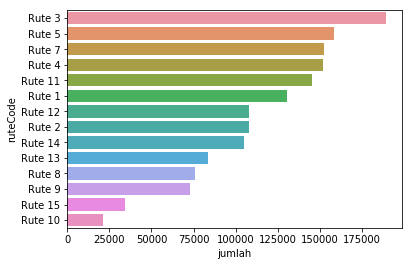

In [288]:
sns.barplot(y='ruteCode',x='jumlah',data=fixMergeDum)

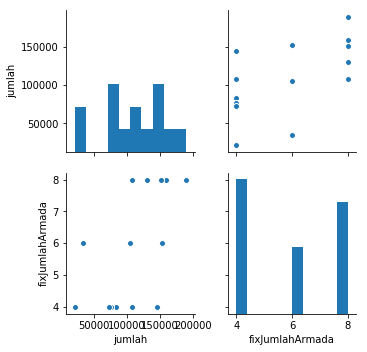

In [266]:
sns.pairplot(fixMerge)